In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [4]:
data = pd.read_csv('YourData.csv')

# Initial Data Inspection
print("Data Info:")
print(data.info())
print("\nData Description:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26679 entries, 0 to 26678
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   number           26679 non-null  int64  
 1   relaxation       26679 non-null  int64  
 2   dental caries    26679 non-null  int64  
 3   height(cm)       26679 non-null  int64  
 4   weight(kg)       26679 non-null  int64  
 5   age              26679 non-null  int64  
 6   Urine protein    26679 non-null  int64  
 7   ALT              26679 non-null  int64  
 8   LDL              26679 non-null  int64  
 9   AST              26679 non-null  int64  
 10  eyesight(right)  26679 non-null  float64
 11  smoking          26678 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 2.4 MB
None

Data Description:
             number    relaxation  dental caries    height(cm)    weight(kg)  \
count  26679.000000  26679.000000   26679.000000  26679.000000  26679.000000   
m

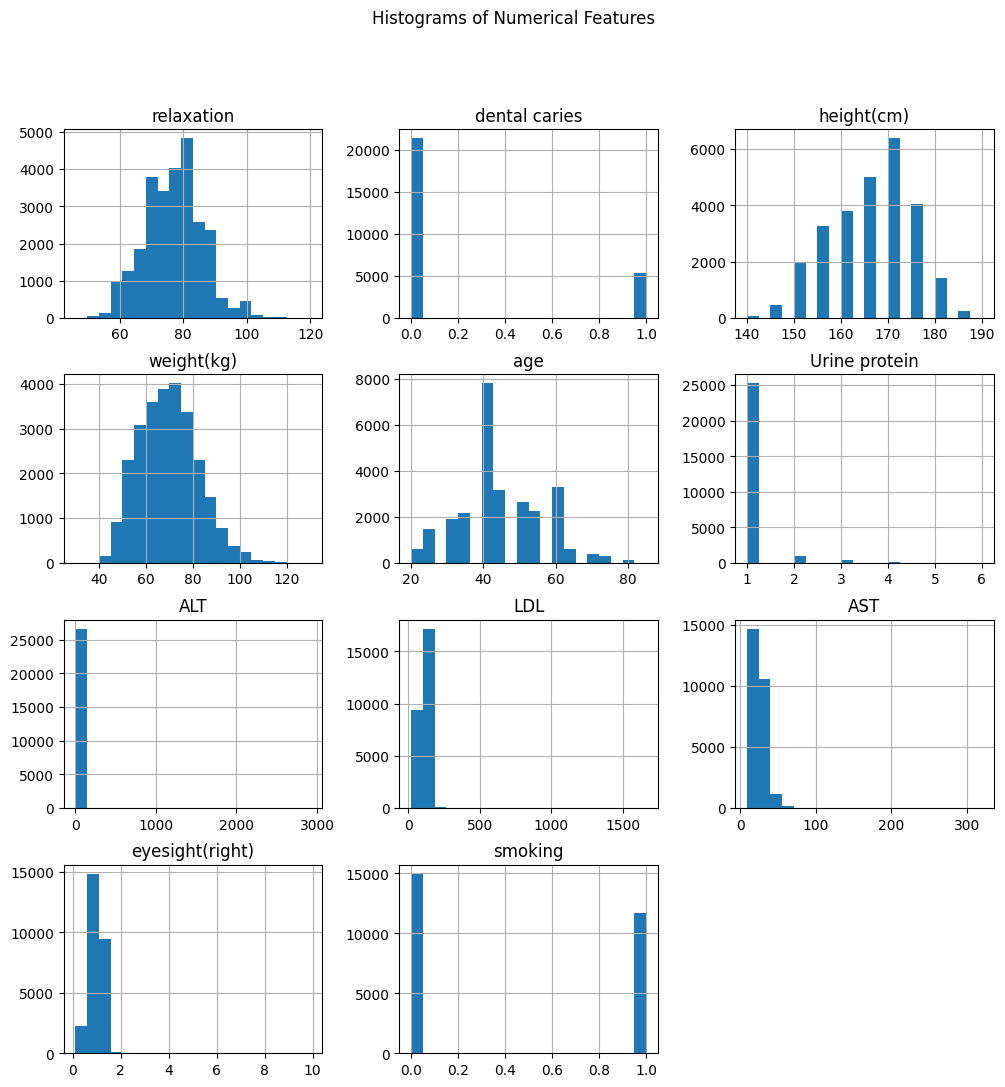

In [5]:
# Histograms
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
if 'id' in numerical_features:
    numerical_features = numerical_features.drop('id')
if 'number' in numerical_features:
    numerical_features = numerical_features.drop('number')

data[numerical_features].hist(figsize=(12, 12), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()


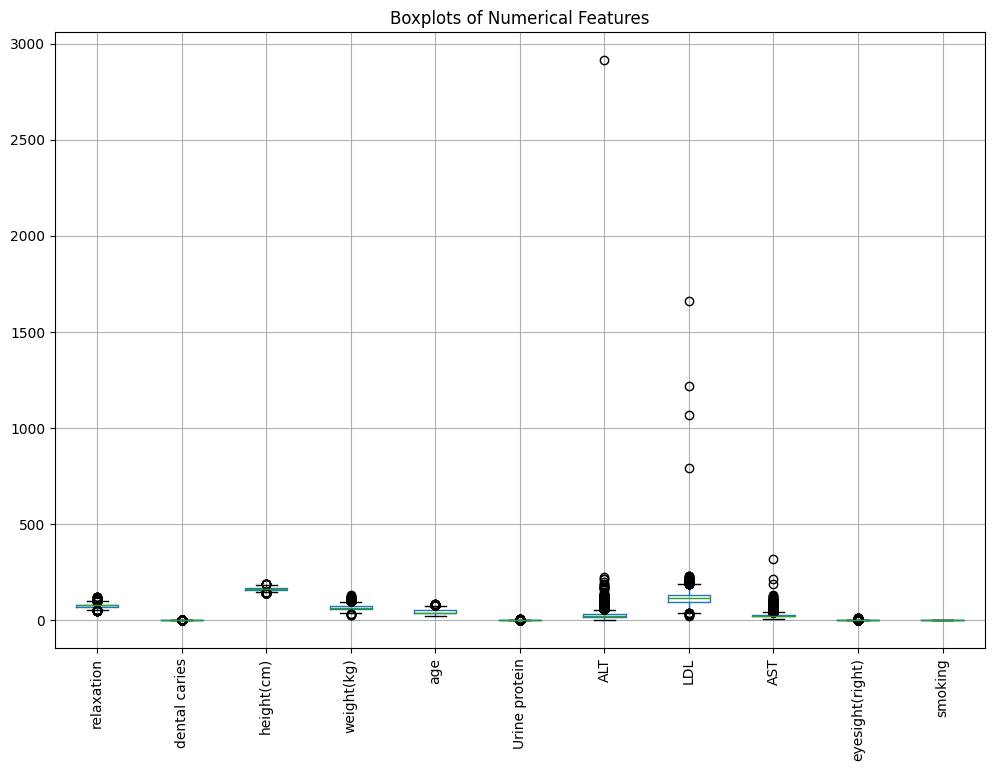

In [6]:
plt.figure(figsize=(12, 8))
data[numerical_features].boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=90)
plt.show()


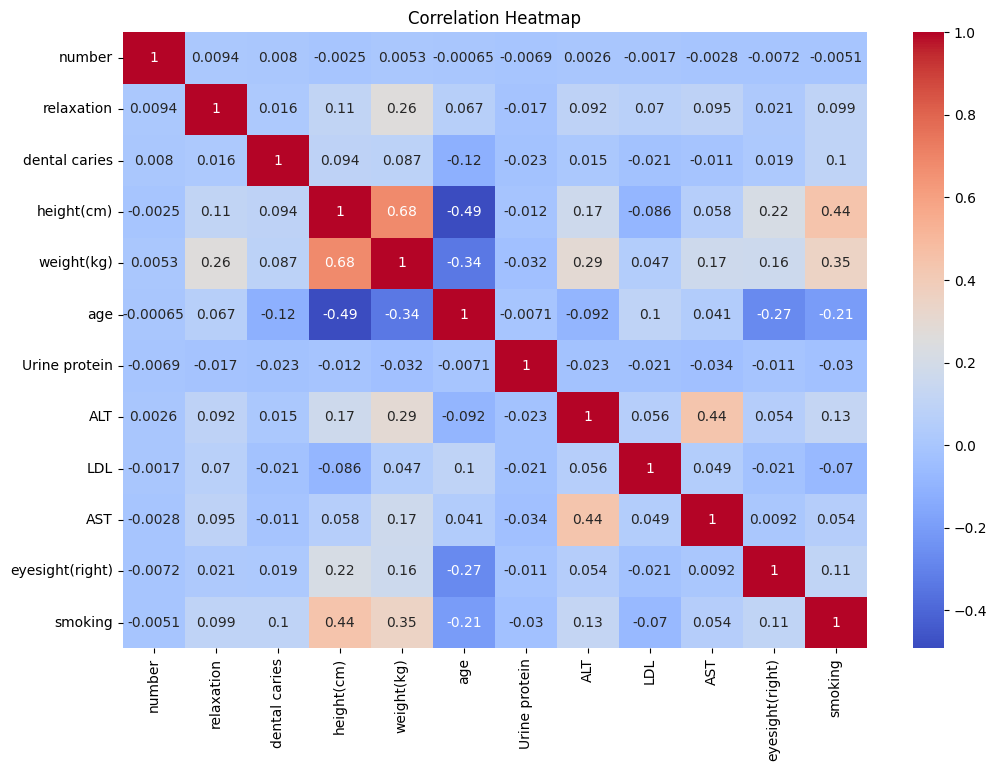

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

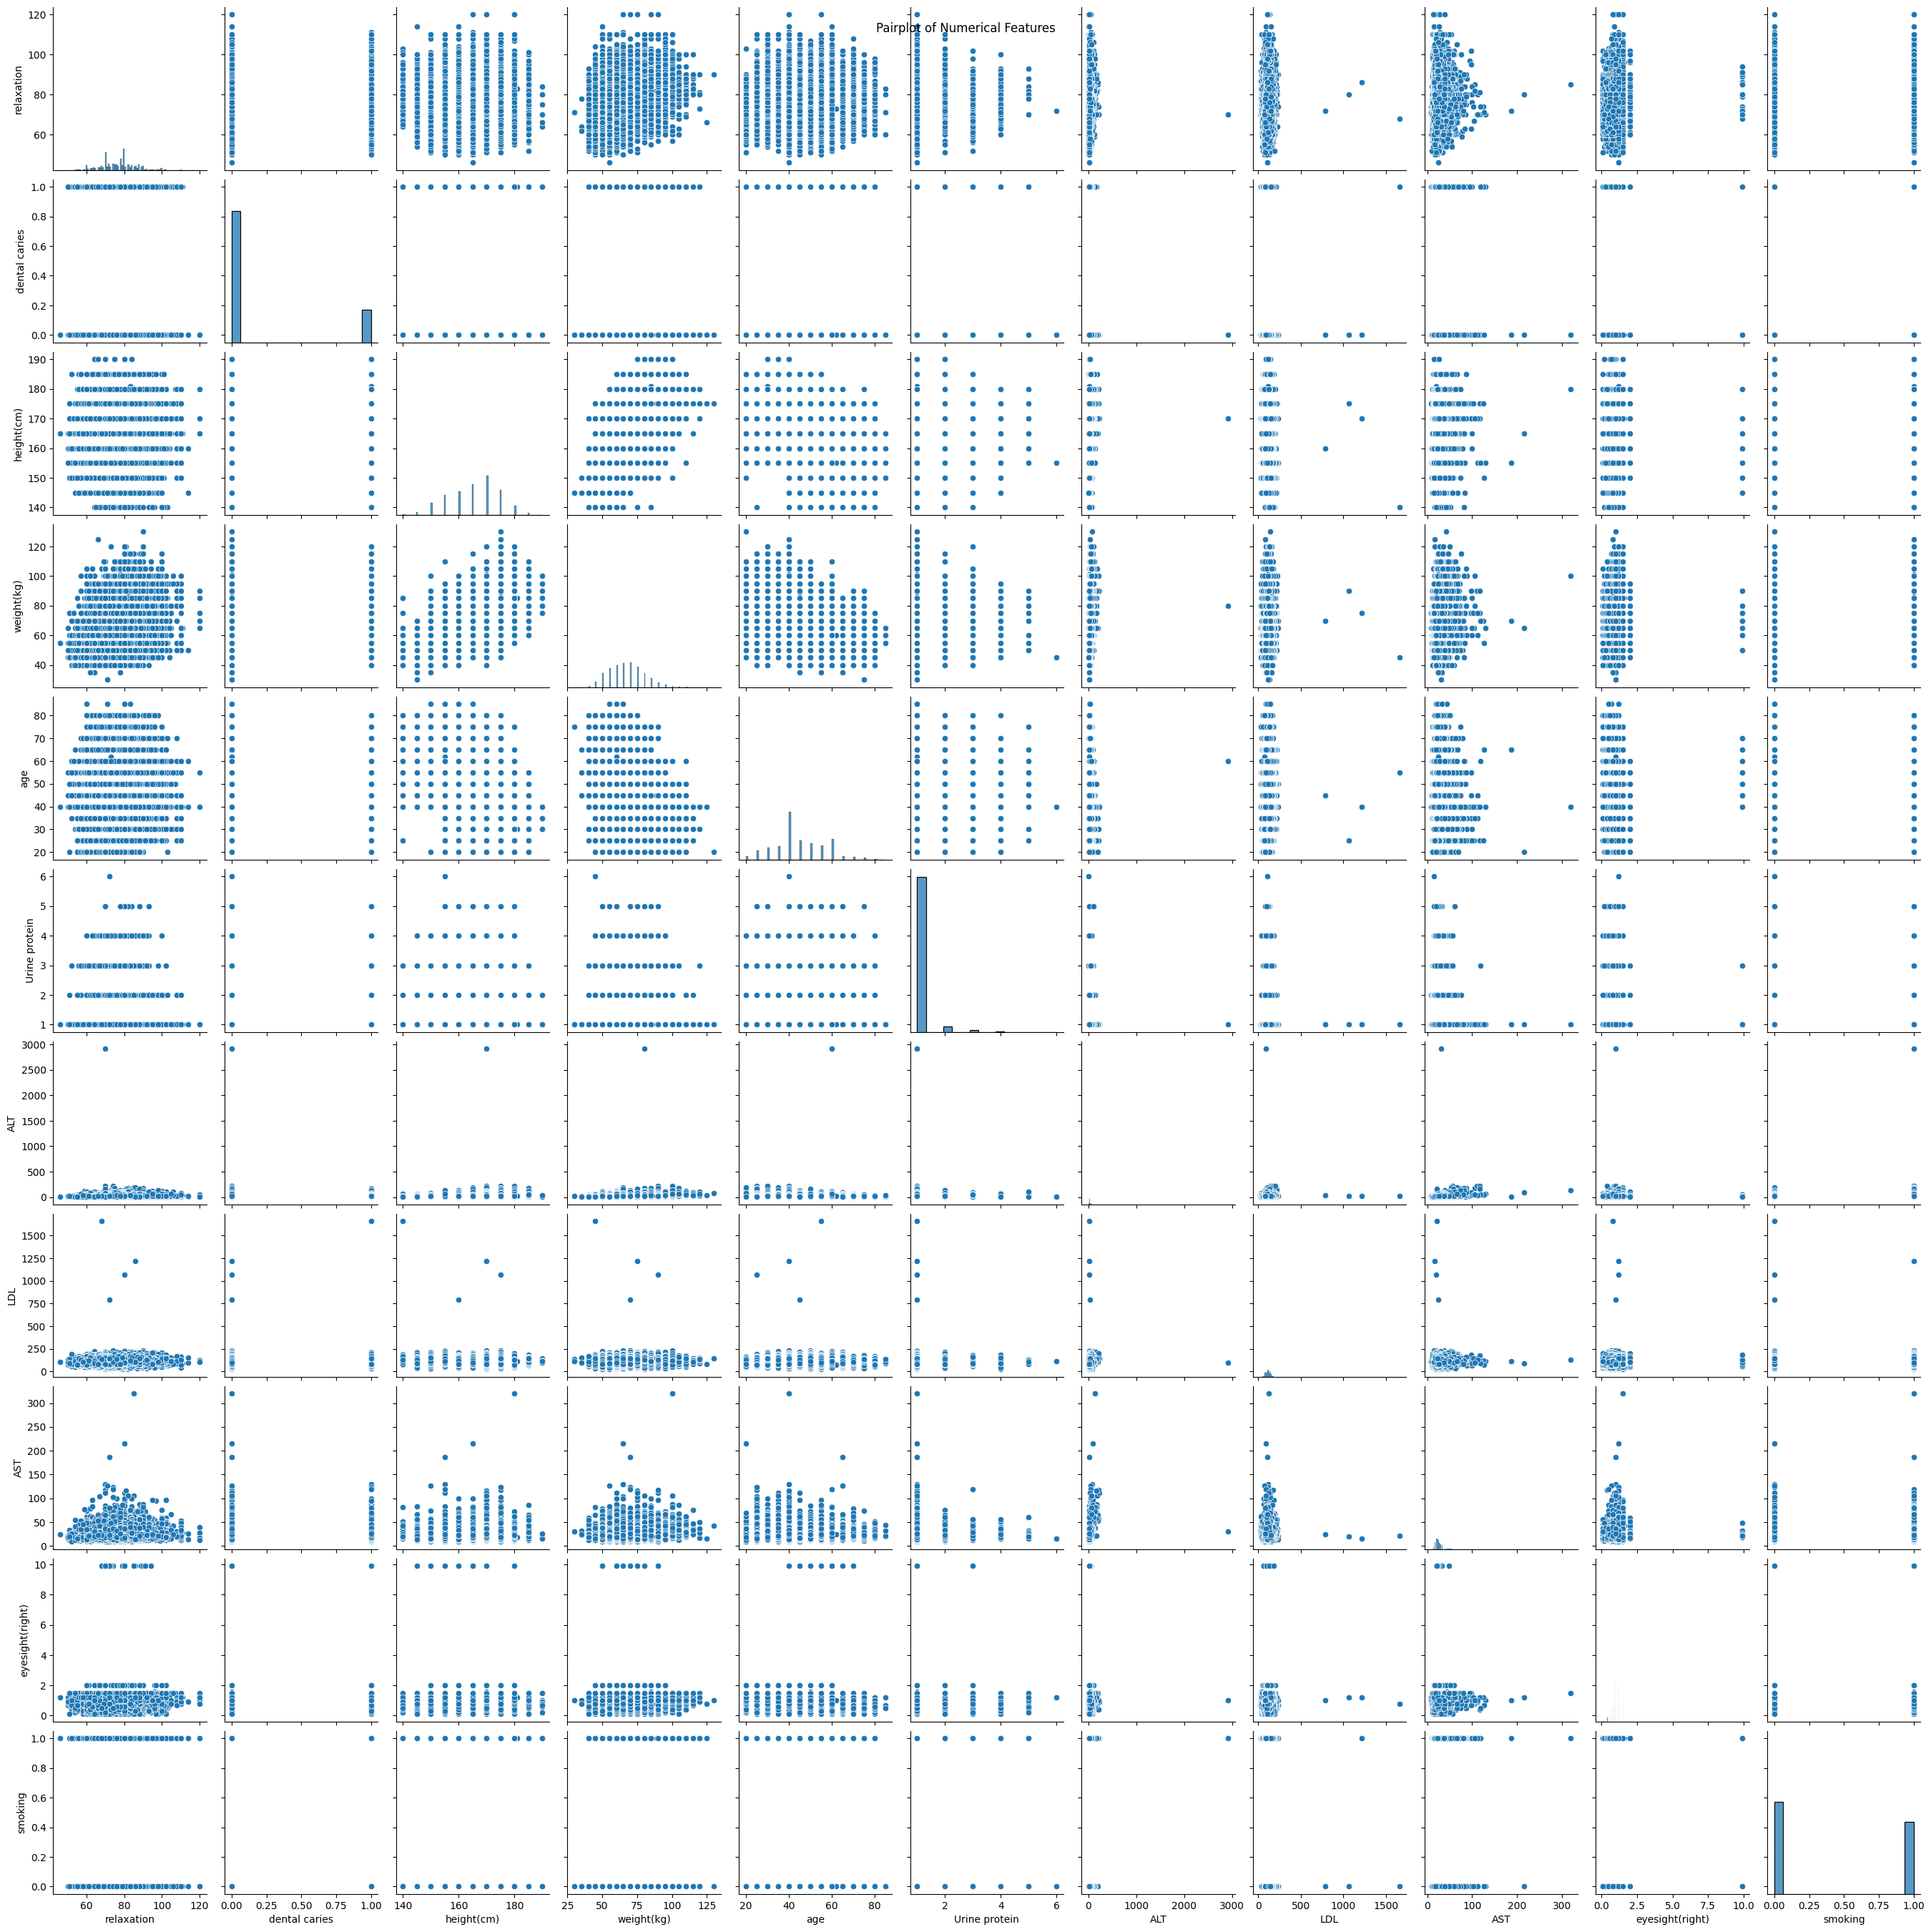

In [8]:
sns.pairplot(data[numerical_features])
plt.suptitle('Pairplot of Numerical Features')
plt.show()


In [18]:
scaler = StandardScaler()
data_cleaned = data.dropna(subset = numerical_features)
scaled_data = scaler.fit_transform(data_cleaned[numerical_features])


In [20]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

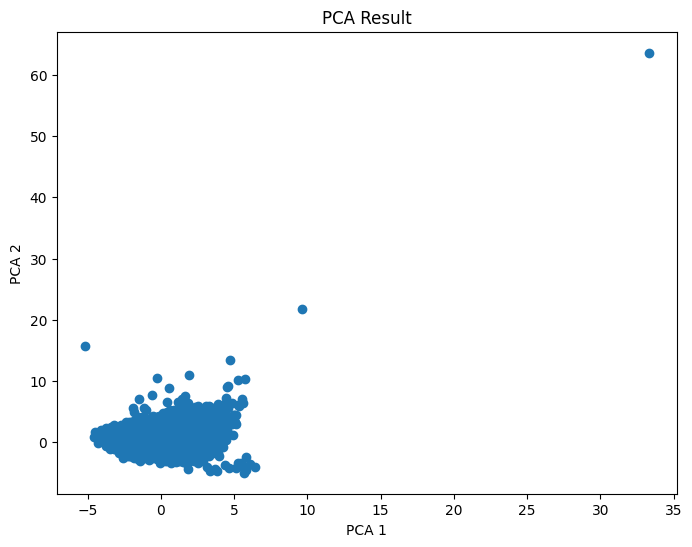

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Result')
plt.show()

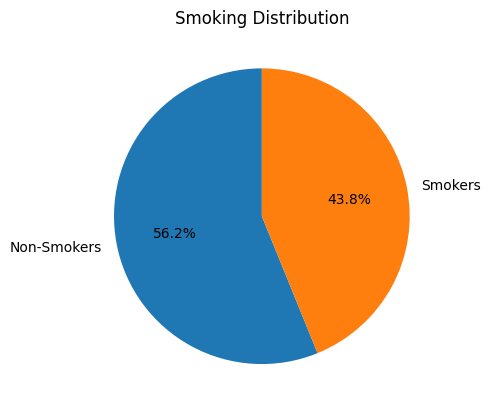

In [22]:
smoking_count = data['smoking'].value_counts()
labels = ['Non-Smokers', 'Smokers']

plt.pie(smoking_count, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Smoking Distribution')
plt.show()

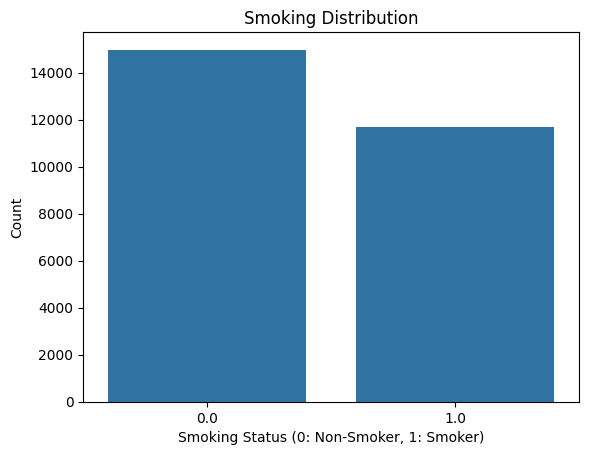

In [23]:
sns.countplot(x='smoking', data=data)
plt.title('Smoking Distribution')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Count')
plt.show()

In [24]:
print("\nSummary statistics after scaling:")
print(pd.DataFrame(scaled_data, columns=numerical_features).describe())



Summary statistics after scaling:
         relaxation  dental caries    height(cm)    weight(kg)           age  \
count  2.667800e+04   2.667800e+04  2.667800e+04  2.667800e+04  2.667800e+04   
mean   2.855168e-16  -7.936942e-17 -1.362064e-15 -4.975903e-16 -3.116182e-16   
std    1.000019e+00   1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00   
min   -3.432321e+00  -4.990276e-01 -2.862729e+00 -2.961898e+00 -2.074402e+00   
25%   -7.676877e-01  -4.990276e-01 -5.972943e-01 -5.719783e-01 -3.802635e-01   
50%    1.205234e-01  -4.990276e-01 -3.093553e-02 -1.736584e-01 -3.802635e-01   
75%    5.646290e-01  -4.990276e-01  5.354232e-01  6.229814e-01  8.903403e-01   
max    4.783632e+00   2.003897e+00  2.800858e+00  5.004501e+00  3.431548e+00   

       Urine protein           ALT           LDL           AST  \
count   2.667800e+04  2.667800e+04  2.667800e+04  2.667800e+04   
mean   -8.682695e-17 -2.317161e-17 -1.747193e-16  4.794126e-18   
std     1.000019e+00  1.000019e+00  1.000019e+

In [25]:
data['age_weight_interaction'] = data['age'] * data['weight(kg)']
data['age_squared'] = data['age'] ** 2
print(data.head())

   number  relaxation  dental caries  height(cm)  weight(kg)   age  \
0       0        87.0            0.0       165.0        60.0  55.0   
1       1        83.0            1.0       165.0        65.0  70.0   
2       2        75.0            0.0       170.0        75.0  20.0   
3       3        88.0            1.0       180.0        95.0  35.0   
4       4        76.0            0.0       165.0        60.0  30.0   

   Urine protein   ALT    LDL   AST  eyesight(right)  smoking  \
0            1.0  25.0   75.0  22.0              0.6      1.0   
1            1.0  23.0  126.0  27.0              0.7      0.0   
2            1.0  31.0   93.0  27.0              0.5      1.0   
3            1.0  27.0  102.0  20.0              1.2      0.0   
4            1.0  13.0   93.0  19.0              1.0      1.0   

   age_weight_interaction  age_squared  
0                  3300.0       3025.0  
1                  4550.0       4900.0  
2                  1500.0        400.0  
3                  3325.

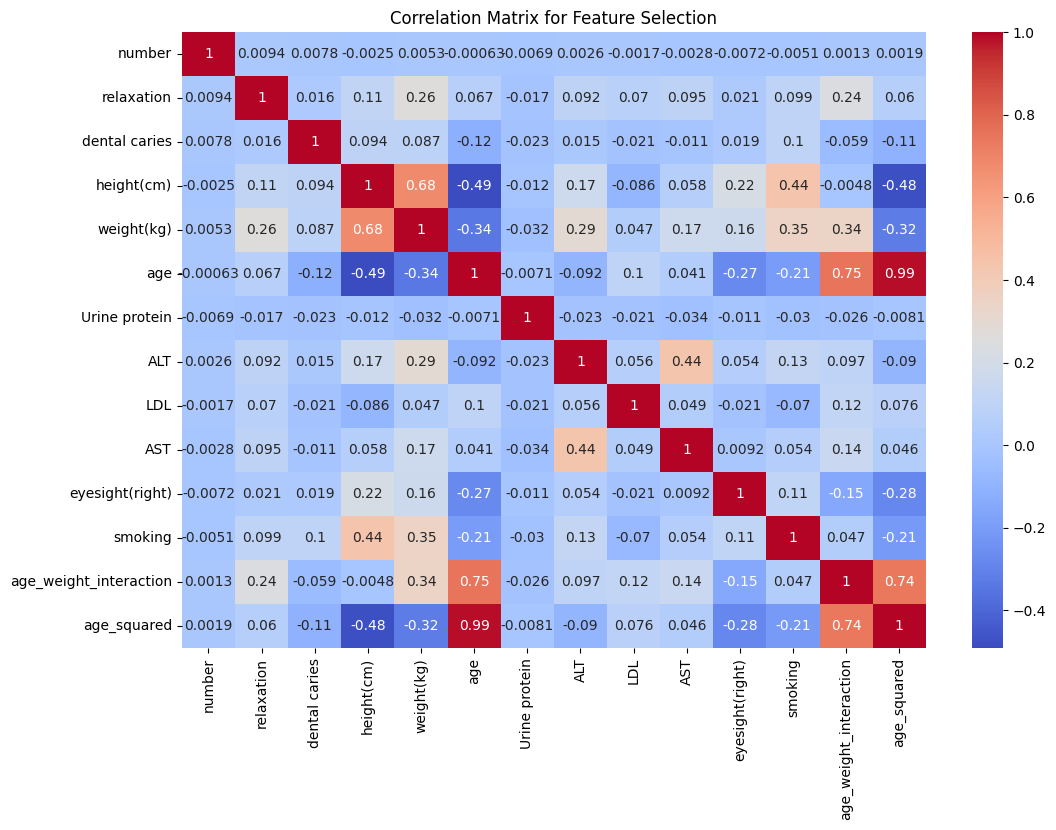

In [26]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Feature Selection')
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [32]:
X = data.drop(columns=['smoking'])
y = data['smoking']
X = X.dropna()
y = y[X.index]
model = RandomForestClassifier()
model.fit(X, y)


RandomForestClassifier()

In [31]:
sfm = SelectFromModel(model, threshold=0.1)
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['number', 'height(cm)', 'ALT', 'LDL'], dtype='object')


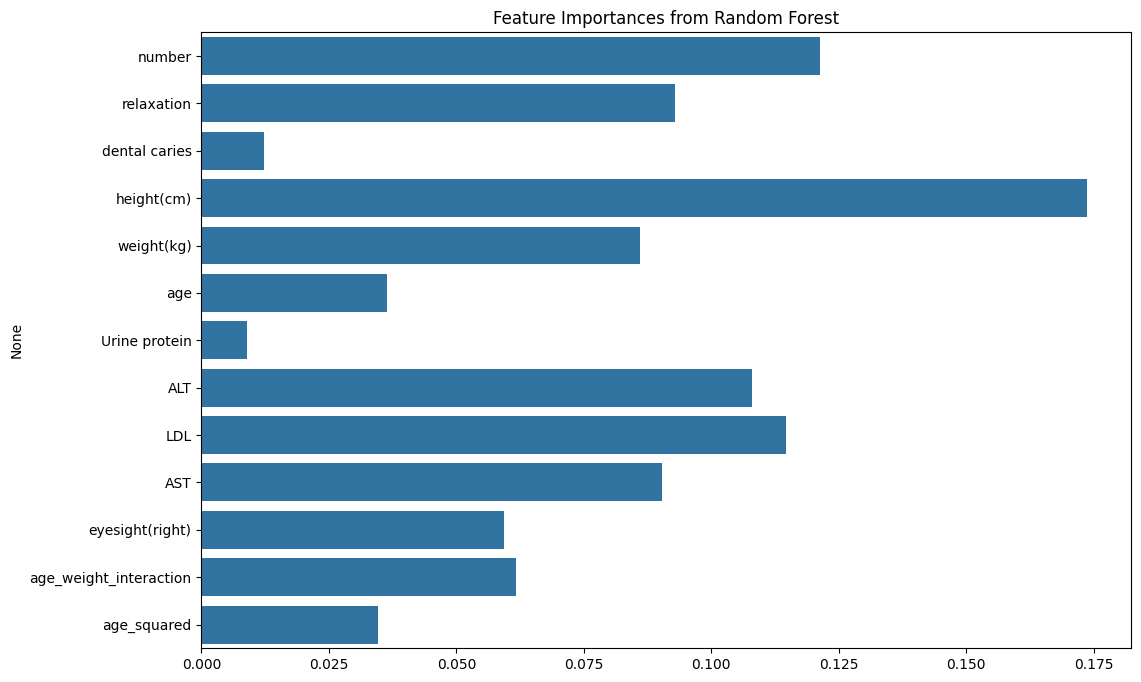

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importances from Random Forest')
plt.show()